# Importing Dependencies

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import random
import cv2
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Data preparation

In [3]:
no_tb_data = "TB_Chest_Radiography_Database/Normal"
tb_data = "TB_Chest_Radiography_Database/Tuberculosis"

In [4]:
X_yes = []
for image in tqdm(os.listdir(tb_data)):
    image_path = os.path.join(tb_data, image)
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))
    X_yes.append(img)

100%|██████████| 700/700 [00:05<00:00, 138.41it/s]


In [5]:
x_yes = np.array(X_yes)

In [6]:
# I found that data augmentation for tuberculosis is very important because there is a significant imbalance between normal and tuberculosis data.
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2,
                             horizontal_flip=True, fill_mode='nearest')

aug_images = []
for image in tqdm(x_yes):  
    image = np.expand_dims(image, axis=0)  
    i = 0
    for batch in datagen.flow(image, batch_size=1):
        aug_images.append(batch[0])  
        i += 1
        if i >= 5:  
            break

100%|██████████| 700/700 [00:33<00:00, 20.68it/s]


In [7]:
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2,
                             horizontal_flip=True, fill_mode='nearest')

aug_images = []
for image in tqdm(x_yes):  
    image = np.expand_dims(image, axis=0)  
    i = 0
    for batch in datagen.flow(image, batch_size=1):
        aug_images.append(batch[0])  
        i += 1
        if i >= 5:  
            break

100%|██████████| 3500/3500 [00:00<00:00, 1755778.50it/s]


In [8]:
X_no = []
for image in tqdm(os.listdir(no_tb_data)):
    image_path = os.path.join(no_tb_data, image)
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))
    X_no.append(img)

100%|██████████| 3500/3500 [00:25<00:00, 134.69it/s]


In [9]:
TB_no = []
for image in tqdm(X_no):
    TB_no.append([image, 0])

100%|██████████| 3500/3500 [00:00<00:00, 1433180.12it/s]


In [10]:
data = TB_yes + TB_no

In [11]:
random.shuffle(data)

In [12]:
X = []
y = []
for i, j in tqdm(data):
    X.append(i)
    y.append(j)

100%|██████████| 7000/7000 [00:00<00:00, 2341318.02it/s]


In [13]:
x = np.array(X)
y = np.array(y)

## Train Data

In [14]:
x_train = x[:5500]
y_train = y[:5500]

## Test Data

In [15]:
x_test = x[5500:7000]
y_test = y[5500:7000]

# Model

In [16]:
model = Sequential()

model.add(Conv2D(100,(3, 3), activation = "relu", input_shape = (224, 224, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(100,(3, 3), activation = "relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64,(3, 3), activation = "relu"))
#model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64,(3, 3), activation = "relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(.2))
#model.add(Dense(32, activation = "relu"))
model.add(Dropout(.3))
model.add(Dense(32, activation = "relu"))
model.add(Dense(1, activation = 'sigmoid'))


model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])



c:\Users\vedth\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Training

In [17]:
history = model.fit(x_train, y_train, validation_split= .2, epochs = 5)

Epoch 1/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 146s 983ms/step - accuracy: 0.6775 - loss: 3.6884 - val_accuracy: 0.9145 - val_loss: 0.3052
Epoch 2/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 128s 925ms/step - accuracy: 0.9062 - loss: 0.3118 - val_accuracy: 0.9491 - val_loss: 0.1732
Epoch 3/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.9370 - loss: 0.2400 - val_accuracy: 0.8927 - val_loss: 0.2281
Epoch 4/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 458s 3s/step - accuracy: 0.8697 - loss: 0.3807 - val_accuracy: 0.8873 - val_loss: 0.3213
Epoch 5/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 275s 2s/step - accuracy: 0.8953 - loss: 0.3182 - val_accuracy: 0.8891 - val_loss: 0.2831


# Loss and Accuracy 

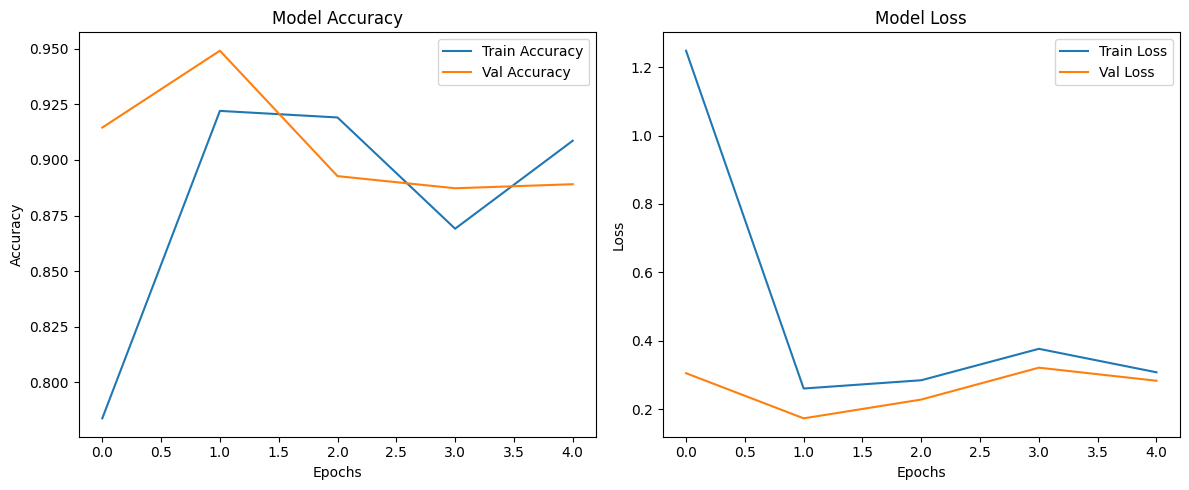

In [18]:
model.save('model.keras')
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Confution Matrix

In [19]:
threshold = 0.5
y_pred = (model.predict(x_test)>= threshold).astype(int)

47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 241ms/step


<Figure size 1200x1000 with 0 Axes>

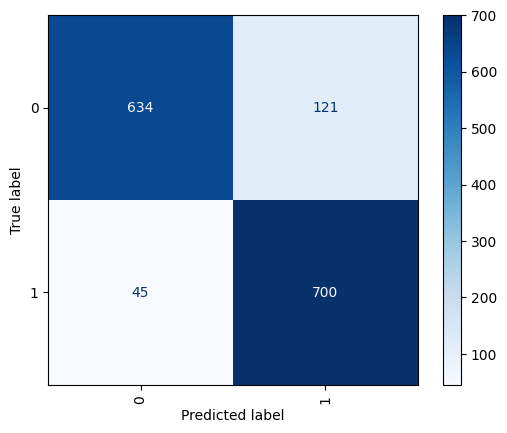

In [20]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

# Model Evaluation

In [21]:
model.evaluate(x_test, y_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 235ms/step - accuracy: 0.8949 - loss: 0.2788


[0.2887195646762848, 0.8893333077430725]